# データ読み込み

- ファイルの確認
- ライブラリの読み込み
- データの読み込み
- 構造の把握
- 長さの把握
- 欠損の確認

In [1]:
!ls

beginner2.ipynb  lightgbm.ipynb  sub5.csv    submit_sample.csv
beginner3.ipynb  sub1.csv	 sub6.csv    test.csv
beginner4.ipynb  sub2.csv	 sub7.csv    train.csv
beginner.ipynb	 sub3.csv	 sub8.csv    重回帰分析template.ipynb
catboost_info	 sub4.csv	 submit.csv


In [2]:
# データ操作系
import pandas as pd
import numpy as np
import collections
# グラフ描画系
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# 前処理
import sklearn.preprocessing as sp
# データ分割
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
# 機械学習モデル
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.svm import SVC # SVM
import lightgbm as lgb #LightGBM
import xgboost as xgb  
from catboost import CatBoost
from catboost import CatBoostClassifier
from catboost import Pool
# チューニング
from sklearn import metrics
import optuna
# 制御系
import warnings
warnings.simplefilter('ignore')
import gc


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv")

In [4]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [5]:
sample.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
print(len(train))
print(len(test))
print(len(sample))

27100
18050
18049


In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# データの結合

- 同時に処理するため一時的にtrainとtestを結合する
- 長さの検算
- 欠損の検算

In [9]:
data = pd.concat([train, test], sort=False)

In [10]:
print(len(train), len(test), len(data))

27100 18050 45150


In [11]:
data.isnull().sum()

id               0
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y            18050
dtype: int64

# 特徴量エンジニアリング

In [12]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [13]:
train.describe(include= 'O' )

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27100,27100,27100,27100,27100,27100,27100,27100,27100
unique,11,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5957,17565,15955,27090,15819,23651,19147,11232,23099


## age

In [14]:
data['isRetire'] = 0
data.loc[data['age'] == 60, 'isRetire'] = 1

## balance

## day

## duration

## campaign

## pdays

## previous

## job

## material

## education

## default

## housing

## loan

## contact

## month

## poutcome

## カテゴリー変数

In [15]:
categorical_features = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
for i in categorical_features:
    label_encoder = sp.LabelEncoder()
    label_encoder.fit(data[i])
    label_encoder.transform(data[i])
    data[i]=label_encoder.transform(data[i])

## 整形完了後

In [16]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,isRetire
0,0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0.0,0
1,1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1.0,0
2,2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0.0,0
3,3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0.0,0
4,4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0.0,0


# 相関の確認

In [17]:
data.corr()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,isRetire
id,1.000000,0.006042,0.006986,-0.008836,-0.004599,0.008952,0.001891,0.003951,0.010476,-0.011158,-0.001089,-0.002621,-0.004184,-0.002797,0.000338,-0.004696,-0.007088,0.002318,0.004806
age,0.006042,1.000000,0.048086,-0.209372,-0.053898,-0.003564,0.000678,-0.285335,-0.044623,-0.054893,-0.064515,-0.129942,-0.057669,0.033344,0.004698,0.037856,-0.002386,0.086668,0.431069
job,0.006986,0.048086,1.000000,0.028342,0.171798,0.001599,0.006206,-0.066930,0.012703,-0.046596,0.018764,-0.041526,-0.009833,-0.008934,-0.005991,0.002402,-0.018052,-0.000511,0.017026
marital,-0.008836,-0.209372,0.028342,1.000000,0.168923,-0.007550,-0.001651,-0.036154,-0.014937,-0.021453,-0.006567,-0.022269,-0.026807,-0.037668,-0.001891,0.030155,-0.050204,0.081587,0.002500
education,-0.004599,-0.053898,0.171798,0.168923,1.000000,-0.005068,0.001845,-0.082079,-0.055173,-0.069556,0.000948,-0.043812,-0.023502,-0.011010,0.001931,0.028109,-0.045916,0.075080,0.020457
default,0.008952,-0.003564,0.001599,-0.007550,-0.005068,1.000000,0.001155,-0.002895,0.004562,-0.003940,-0.009330,-0.003705,-0.004591,-0.010390,0.003120,-0.004179,0.005681,-0.005586,-0.002487
balance,0.001891,0.000678,0.006206,-0.001651,0.001845,0.001155,1.000000,0.005037,-0.008646,0.000181,0.001772,0.004438,0.000807,-0.004737,-0.001370,0.005881,-0.009723,-0.000899,-0.000405
housing,0.003951,-0.285335,-0.066930,-0.036154,-0.082079,-0.002895,0.005037,1.000000,0.009817,0.118939,0.131649,0.320652,0.183220,-0.103906,0.003761,-0.040770,-0.047447,-0.164710,-0.099889
loan,0.010476,-0.044623,0.012703,-0.014937,-0.055173,0.004562,-0.008646,0.009817,1.000000,0.039239,-0.094751,-0.043638,-0.068805,0.103973,-0.005237,-0.051736,0.065985,-0.062696,-0.041606
contact,-0.011158,-0.054893,-0.046596,-0.021453,-0.069556,-0.003940,0.000181,0.118939,0.039239,1.000000,-0.094050,0.278705,0.034556,-0.051145,0.001320,-0.124929,0.208653,-0.083513,-0.021185


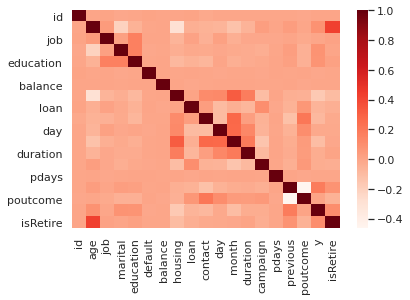

In [18]:
sns.heatmap(data.corr(),cmap="Reds")

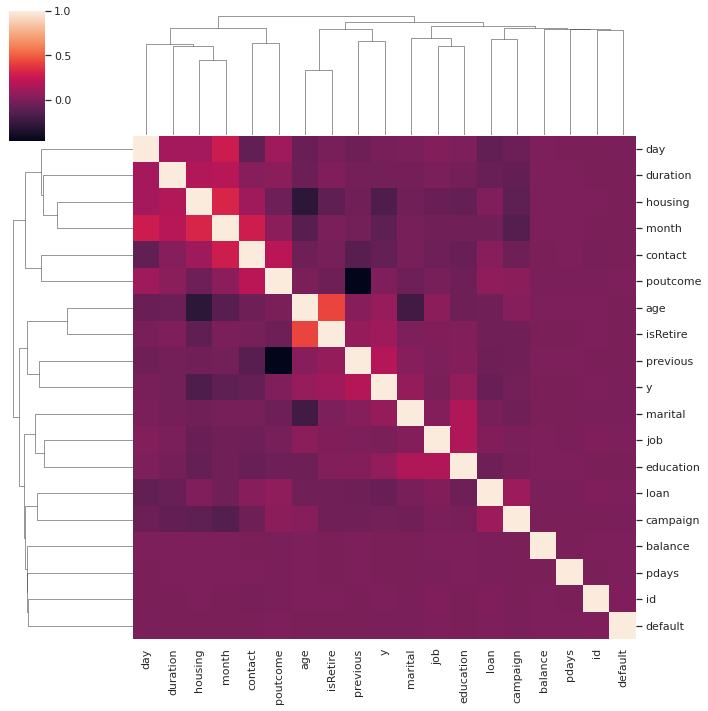

In [19]:
sns.clustermap(data.corr())

# 採用するカラムの決定

In [20]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'isRetire'],
      dtype='object')

In [21]:
adopt_columns = ['age', 'job', 'marital', 'education',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'previous', 'poutcome', 'y',"isRetire"]
categorical_features = ['job', 'marital', 'education','housing','loan','contact','month','poutcome',"isRetire"]
adopt_data = data[adopt_columns]
adopt_data.head()

,age,job,marital,education,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,isRetire
0,31,7,1,1,1,0,0,21,8,101,3,0,1,0.0,0
1,29,2,2,2,0,0,0,22,1,158,2,0,3,1.0,0
2,35,4,1,2,1,0,0,11,8,351,1,0,0,0.0,0
3,31,9,1,1,1,1,2,16,7,658,2,0,0,0.0,0
4,48,10,1,0,1,0,1,3,0,177,1,0,3,0.0,0


In [22]:
# 標準化？
#scale = sp.StandardScaler()
#scale.fit(adopt_data)

#X_train = scale.transform(adopt_data)

## データをtrainとtestに戻す

In [23]:
train = adopt_data[:len(train)]
test = adopt_data[len(train):]

## データを分割する

In [24]:
y_train = train['y']
X_train = train.drop('y', axis=1)
X_test = test.drop('y', axis=1)

#### 評価関数

In [25]:
def get_evaluate(y_test, predict):

    fpr, tpr, thr_arr = metrics.roc_curve(y_test, predict)

    accuracy = metrics.auc(fpr, tpr)
    roc = metrics.roc_auc_score(y_test, predict)      
    
    return roc

## LightGBT

In [26]:
# パラメータチューニング
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features, free_raw_data=False)
lgb_test = lgb.Dataset(X_test)

params = {
    'metric' :'auc',
    "objective": "binary",
}

clf = optuna.integration.lightgbm.train(
     params, lgb_train, valid_sets=lgb_test, verbose_eval=10, early_stopping_rounds=5,
 )

best_params = clf.params

feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction, val_score: 1.000000:  14%|#4        | 1/7 [00:00<00:01,  3.99it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction, val_score: 1.000000:  29%|##8       | 2/7 [00:00<00:01,  3.76it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction, val_score: 1.000000:  43%|####2     | 3/7 [00:00<00:01,  3.42it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction, val_score: 1.000000:  57%|#####7    | 4/7 [00:01<00:00,  3.34it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction, val_score: 1.000000:  71%|#######1  | 5/7 [00:01<00:00,  3.70it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction, val_score: 1.000000:  86%|########5 | 6/7 [00:01<00:00,  3.44it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:   5%|5         | 1/20 [00:00<00:06,  3.07it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  10%|#         | 2/20 [00:00<00:05,  3.12it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  15%|#5        | 3/20 [00:01<00:05,  2.99it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  20%|##        | 4/20 [00:01<00:05,  3.19it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  25%|##5       | 5/20 [00:01<00:04,  3.08it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  30%|###       | 6/20 [00:01<00:04,  3.15it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  35%|###5      | 7/20 [00:02<00:04,  3.11it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  40%|####      | 8/20 [00:02<00:03,  3.02it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  45%|####5     | 9/20 [00:02<00:03,  3.33it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  50%|#####     | 10/20 [00:03<00:02,  3.53it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  55%|#####5    | 11/20 [00:03<00:02,  3.47it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  60%|######    | 12/20 [00:03<00:02,  3.66it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  65%|######5   | 13/20 [00:04<00:01,  3.72it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  70%|#######   | 14/20 [00:04<00:02,  2.64it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  75%|#######5  | 15/20 [00:04<00:01,  2.80it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  80%|########  | 16/20 [00:05<00:01,  3.17it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  85%|########5 | 17/20 [00:05<00:00,  3.37it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  90%|######### | 18/20 [00:05<00:00,  3.49it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


num_leaves, val_score: 1.000000:  95%|#########5| 19/20 [00:05<00:00,  3.84it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  10%|#         | 1/10 [00:00<00:01,  5.73it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  20%|##        | 2/10 [00:00<00:01,  5.69it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  30%|###       | 3/10 [00:00<00:01,  5.25it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  40%|####      | 4/10 [00:00<00:01,  4.85it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  50%|#####     | 5/10 [00:01<00:01,  4.57it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  60%|######    | 6/10 [00:01<00:00,  4.57it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  70%|#######   | 7/10 [00:01<00:00,  4.73it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  80%|########  | 8/10 [00:01<00:00,  4.55it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


bagging, val_score: 1.000000:  90%|######### | 9/10 [00:01<00:00,  4.54it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction_stage2, val_score: 1.000000:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction_stage2, val_score: 1.000000:  17%|#6        | 1/6 [00:00<00:01,  3.42it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction_stage2, val_score: 1.000000:  33%|###3      | 2/6 [00:00<00:01,  3.11it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction_stage2, val_score: 1.000000:  50%|#####     | 3/6 [00:01<00:00,  3.23it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction_stage2, val_score: 1.000000:  67%|######6   | 4/6 [00:01<00:00,  3.31it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


feature_fraction_stage2, val_score: 1.000000:  83%|########3 | 5/6 [00:01<00:00,  3.36it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:   5%|5         | 1/20 [00:00<00:05,  3.61it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  10%|#         | 2/20 [00:00<00:05,  3.58it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  15%|#5        | 3/20 [00:00<00:04,  3.74it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  20%|##        | 4/20 [00:00<00:03,  4.23it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  25%|##5       | 5/20 [00:01<00:03,  4.55it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  30%|###       | 6/20 [00:01<00:03,  4.09it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  35%|###5      | 7/20 [00:01<00:03,  4.09it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  40%|####      | 8/20 [00:02<00:03,  3.67it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  45%|####5     | 9/20 [00:02<00:02,  3.83it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  50%|#####     | 10/20 [00:02<00:02,  3.98it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  55%|#####5    | 11/20 [00:02<00:02,  3.75it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  60%|######    | 12/20 [00:02<00:01,  4.47it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  65%|######5   | 13/20 [00:03<00:01,  4.47it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  70%|#######   | 14/20 [00:03<00:01,  5.50it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  75%|#######5  | 15/20 [00:03<00:00,  5.27it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  80%|########  | 16/20 [00:04<00:01,  2.91it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  85%|########5 | 17/20 [00:04<00:00,  3.34it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  90%|######### | 18/20 [00:04<00:00,  3.91it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


regularization_factors, val_score: 1.000000:  95%|#########5| 19/20 [00:04<00:00,  3.93it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


min_data_in_leaf, val_score: 1.000000:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


min_data_in_leaf, val_score: 1.000000:  20%|##        | 1/5 [00:00<00:00,  5.03it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


min_data_in_leaf, val_score: 1.000000:  40%|####      | 2/5 [00:00<00:00,  4.76it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


min_data_in_leaf, val_score: 1.000000:  60%|######    | 3/5 [00:00<00:00,  5.17it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


min_data_in_leaf, val_score: 1.000000:  80%|########  | 4/5 [00:00<00:00,  4.91it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1


min_data_in_leaf, val_score: 1.000000: 100%|##########| 5/5 [00:01<00:00,  4.53it/s]


In [27]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

roc_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_tr = X_train.iloc[train_index]
    y_tr = y_train.iloc[train_index]
    X_va = X_train.iloc[test_index]
    y_va = y_train.iloc[test_index]
    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    lgb_test = lgb.Dataset(X_test)
    params = {
        'metric' :'auc',
        'objective': 'binary'
    }

    clf = lgb.train(best_params, lgb_train,100)

    y_predict = clf.predict(X_va, num_iteration=clf.best_iteration)
    roc= get_evaluate(y_va, y_predict)
    print('roc:{}'.format(roc))

    roc_list.append(roc)
print('Kfold平均 roc:{}'.format(np.mean(roc_list)))
y_predict

roc:0.8564003145752386
roc:0.8518754153508836
roc:0.8466815586633099
roc:0.8527761507341707
Kfold平均 roc:0.8519333598309007


array([0.00250226, 0.00105982, 0.09370432, ..., 0.04173839, 0.10555887,
       0.0112777 ])

In [28]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

roc_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_tr = X_train.iloc[train_index]
    y_tr = y_train.iloc[train_index]
    X_va = X_train.iloc[test_index]
    y_va = y_train.iloc[test_index]
    dtrain = xgb.DMatrix(X_tr, label=y_tr)  
    dvalid = xgb.DMatrix(X_va, label=y_va) 
    param = {'objective': 'binary:logistic'}  
    clf = xgb.train(param, dtrain, 100)  

    y_predict = clf.predict(dvalid)
    print(y_predict[:20])
    print(y_predict.__class__)
    print(y_predict.shape)
    print(y_va.shape)
    roc= get_evaluate(y_va, y_predict)
    print('roc:{}'.format(roc))

    roc_list.append(roc)
print('Kfold平均 roc:{}'.format(np.mean(roc_list)))
y_predict

[7.5507851e-04 2.8925613e-02 9.2966843e-04 9.1641331e-01 8.6563183e-03
 6.6479288e-02 4.1525409e-02 1.5668193e-02 3.3907332e-02 1.8136016e-01
 6.2437441e-02 3.0055887e-01 3.0250909e-02 1.7027175e-02 7.2805367e-02
 9.1482997e-02 2.3476165e-03 5.9917226e-04 4.6775234e-04 1.1954895e-02]
<class 'numpy.ndarray'>
(6775,)
(6775,)
roc:0.83782973402991
[9.1607653e-02 1.4222082e-04 1.3677090e-02 4.1863192e-03 3.0873956e-03
 8.9716576e-02 8.0478162e-04 2.9563965e-02 1.5346863e-02 6.7392066e-03
 2.2883508e-03 3.3350710e-02 8.0849975e-02 5.1131207e-03 7.1950227e-02
 9.4488502e-01 4.4928743e-03 3.3893739e-03 3.8040668e-02 6.2470317e-02]
<class 'numpy.ndarray'>
(6775,)
(6775,)
roc:0.8341255317704013
[0.03322217 0.06694132 0.00182583 0.15797108 0.01982507 0.08676311
 0.0090388  0.07523633 0.02255954 0.01088279 0.00095157 0.04090166
 0.07018386 0.03007834 0.0474343  0.00420342 0.04285583 0.06629887
 0.06776628 0.00930548]
<class 'numpy.ndarray'>
(6775,)
(6775,)
roc:0.8270243959524815
[9.5239998e-04 1.4

array([9.5239998e-04, 1.4351268e-04, 2.1369845e-01, ..., 3.2294933e-02,
       1.8453449e-01, 6.9289589e-03], dtype=float32)

In [30]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

roc_list = []

for train_index, test_index in cv.split(X_train, y_train):
    X_tr = X_train.iloc[train_index]
    y_tr = y_train.iloc[train_index]
    X_va = X_train.iloc[test_index]
    y_va = y_train.iloc[test_index]
    ctrain = Pool(X_tr, label=y_tr)  
    cvalid = Pool(X_va, label=y_va)   
    clf = CatBoost()
    clf.fit(ctrain)
    y_predict = clf.predict(cvalid,prediction_type='RawFormulaVal')

    roc= get_evaluate(y_va, y_predict)
    print('roc:{}'.format(roc))

    roc_list.append(roc)
print('Kfold平均 roc:{}'.format(np.mean(roc_list)))
    


Learning rate set to 0.066716
0:	learn: 0.2656269	total: 220ms	remaining: 3m 39s
1:	learn: 0.2632622	total: 314ms	remaining: 2m 36s
2:	learn: 0.2611699	total: 360ms	remaining: 1m 59s
3:	learn: 0.2593454	total: 375ms	remaining: 1m 33s
4:	learn: 0.2576897	total: 414ms	remaining: 1m 22s
5:	learn: 0.2562687	total: 426ms	remaining: 1m 10s
6:	learn: 0.2548745	total: 453ms	remaining: 1m 4s
7:	learn: 0.2538130	total: 540ms	remaining: 1m 6s
8:	learn: 0.2527783	total: 548ms	remaining: 1m
9:	learn: 0.2518176	total: 574ms	remaining: 56.9s
10:	learn: 0.2508568	total: 584ms	remaining: 52.5s
11:	learn: 0.2500293	total: 613ms	remaining: 50.5s
12:	learn: 0.2491983	total: 627ms	remaining: 47.6s
13:	learn: 0.2486099	total: 648ms	remaining: 45.6s
14:	learn: 0.2479747	total: 742ms	remaining: 48.7s
15:	learn: 0.2473639	total: 762ms	remaining: 46.8s
16:	learn: 0.2468107	total: 771ms	remaining: 44.6s
17:	learn: 0.2463582	total: 920ms	remaining: 50.2s
18:	learn: 0.2459893	total: 940ms	remaining: 48.5s
19:	lear

160:	learn: 0.2298600	total: 3.59s	remaining: 18.7s
161:	learn: 0.2298170	total: 3.6s	remaining: 18.6s
162:	learn: 0.2297970	total: 3.62s	remaining: 18.6s
163:	learn: 0.2297315	total: 3.64s	remaining: 18.5s
164:	learn: 0.2297156	total: 3.65s	remaining: 18.5s
165:	learn: 0.2296874	total: 3.66s	remaining: 18.4s
166:	learn: 0.2296618	total: 3.68s	remaining: 18.4s
167:	learn: 0.2296005	total: 3.7s	remaining: 18.3s
168:	learn: 0.2295245	total: 3.71s	remaining: 18.3s
169:	learn: 0.2294643	total: 3.72s	remaining: 18.2s
170:	learn: 0.2293913	total: 3.75s	remaining: 18.2s
171:	learn: 0.2293030	total: 3.77s	remaining: 18.1s
172:	learn: 0.2292834	total: 3.78s	remaining: 18.1s
173:	learn: 0.2292097	total: 3.79s	remaining: 18s
174:	learn: 0.2291622	total: 3.82s	remaining: 18s
175:	learn: 0.2291403	total: 3.83s	remaining: 17.9s
176:	learn: 0.2290618	total: 3.84s	remaining: 17.9s
177:	learn: 0.2290417	total: 3.85s	remaining: 17.8s
178:	learn: 0.2290006	total: 3.87s	remaining: 17.8s
179:	learn: 0.2289

319:	learn: 0.2227737	total: 6.56s	remaining: 13.9s
320:	learn: 0.2227145	total: 6.58s	remaining: 13.9s
321:	learn: 0.2226752	total: 6.59s	remaining: 13.9s
322:	learn: 0.2226420	total: 6.6s	remaining: 13.8s
323:	learn: 0.2225888	total: 6.61s	remaining: 13.8s
324:	learn: 0.2225396	total: 6.63s	remaining: 13.8s
325:	learn: 0.2224831	total: 6.64s	remaining: 13.7s
326:	learn: 0.2224583	total: 6.7s	remaining: 13.8s
327:	learn: 0.2224193	total: 6.72s	remaining: 13.8s
328:	learn: 0.2223485	total: 6.75s	remaining: 13.8s
329:	learn: 0.2223109	total: 6.78s	remaining: 13.8s
330:	learn: 0.2222392	total: 6.81s	remaining: 13.8s
331:	learn: 0.2222153	total: 6.84s	remaining: 13.8s
332:	learn: 0.2222080	total: 6.86s	remaining: 13.7s
333:	learn: 0.2221714	total: 6.88s	remaining: 13.7s
334:	learn: 0.2221647	total: 6.88s	remaining: 13.7s
335:	learn: 0.2221522	total: 6.92s	remaining: 13.7s
336:	learn: 0.2221320	total: 6.94s	remaining: 13.7s
337:	learn: 0.2220946	total: 6.96s	remaining: 13.6s
338:	learn: 0.

478:	learn: 0.2176729	total: 9.31s	remaining: 10.1s
479:	learn: 0.2176401	total: 9.33s	remaining: 10.1s
480:	learn: 0.2176114	total: 9.36s	remaining: 10.1s
481:	learn: 0.2175762	total: 9.37s	remaining: 10.1s
482:	learn: 0.2175473	total: 9.39s	remaining: 10.1s
483:	learn: 0.2175171	total: 9.41s	remaining: 10s
484:	learn: 0.2174769	total: 9.42s	remaining: 10s
485:	learn: 0.2174525	total: 9.43s	remaining: 9.97s
486:	learn: 0.2174306	total: 9.45s	remaining: 9.95s
487:	learn: 0.2173922	total: 9.46s	remaining: 9.93s
488:	learn: 0.2173756	total: 9.47s	remaining: 9.9s
489:	learn: 0.2173594	total: 9.49s	remaining: 9.88s
490:	learn: 0.2173191	total: 9.5s	remaining: 9.85s
491:	learn: 0.2172949	total: 9.52s	remaining: 9.83s
492:	learn: 0.2172697	total: 9.55s	remaining: 9.82s
493:	learn: 0.2172571	total: 9.57s	remaining: 9.8s
494:	learn: 0.2172419	total: 9.58s	remaining: 9.77s
495:	learn: 0.2172100	total: 9.6s	remaining: 9.76s
496:	learn: 0.2171543	total: 9.62s	remaining: 9.73s
497:	learn: 0.217142

637:	learn: 0.2132842	total: 12.3s	remaining: 6.97s
638:	learn: 0.2132573	total: 12.3s	remaining: 6.95s
639:	learn: 0.2132389	total: 12.3s	remaining: 6.92s
640:	learn: 0.2132187	total: 12.3s	remaining: 6.9s
641:	learn: 0.2132067	total: 12.3s	remaining: 6.88s
642:	learn: 0.2131754	total: 12.3s	remaining: 6.85s
643:	learn: 0.2131519	total: 12.4s	remaining: 6.83s
644:	learn: 0.2131058	total: 12.4s	remaining: 6.81s
645:	learn: 0.2130572	total: 12.4s	remaining: 6.79s
646:	learn: 0.2130355	total: 12.4s	remaining: 6.77s
647:	learn: 0.2130096	total: 12.4s	remaining: 6.74s
648:	learn: 0.2130041	total: 12.4s	remaining: 6.72s
649:	learn: 0.2129854	total: 12.4s	remaining: 6.7s
650:	learn: 0.2129679	total: 12.5s	remaining: 6.7s
651:	learn: 0.2129386	total: 12.5s	remaining: 6.68s
652:	learn: 0.2129072	total: 12.5s	remaining: 6.67s
653:	learn: 0.2128820	total: 12.6s	remaining: 6.64s
654:	learn: 0.2128353	total: 12.6s	remaining: 6.63s
655:	learn: 0.2127867	total: 12.6s	remaining: 6.6s
656:	learn: 0.21

796:	learn: 0.2091010	total: 14.9s	remaining: 3.79s
797:	learn: 0.2090724	total: 14.9s	remaining: 3.77s
798:	learn: 0.2090651	total: 14.9s	remaining: 3.75s
799:	learn: 0.2090397	total: 14.9s	remaining: 3.73s
800:	learn: 0.2090268	total: 14.9s	remaining: 3.71s
801:	learn: 0.2090137	total: 15s	remaining: 3.69s
802:	learn: 0.2089815	total: 15s	remaining: 3.69s
803:	learn: 0.2089712	total: 15.1s	remaining: 3.68s
804:	learn: 0.2089477	total: 15.1s	remaining: 3.66s
805:	learn: 0.2089314	total: 15.1s	remaining: 3.64s
806:	learn: 0.2089239	total: 15.1s	remaining: 3.62s
807:	learn: 0.2088806	total: 15.1s	remaining: 3.6s
808:	learn: 0.2088517	total: 15.1s	remaining: 3.57s
809:	learn: 0.2088126	total: 15.2s	remaining: 3.56s
810:	learn: 0.2087915	total: 15.2s	remaining: 3.54s
811:	learn: 0.2087792	total: 15.2s	remaining: 3.52s
812:	learn: 0.2087651	total: 15.2s	remaining: 3.5s
813:	learn: 0.2087593	total: 15.2s	remaining: 3.48s
814:	learn: 0.2087283	total: 15.3s	remaining: 3.46s
815:	learn: 0.2087

955:	learn: 0.2059276	total: 17.6s	remaining: 812ms
956:	learn: 0.2059150	total: 17.6s	remaining: 793ms
957:	learn: 0.2059072	total: 17.7s	remaining: 775ms
958:	learn: 0.2058992	total: 17.7s	remaining: 757ms
959:	learn: 0.2058817	total: 17.7s	remaining: 739ms
960:	learn: 0.2058792	total: 17.8s	remaining: 721ms
961:	learn: 0.2058597	total: 17.8s	remaining: 702ms
962:	learn: 0.2058315	total: 17.8s	remaining: 683ms
963:	learn: 0.2057951	total: 17.8s	remaining: 665ms
964:	learn: 0.2057872	total: 17.8s	remaining: 646ms
965:	learn: 0.2057559	total: 17.8s	remaining: 627ms
966:	learn: 0.2057449	total: 17.8s	remaining: 609ms
967:	learn: 0.2057305	total: 17.8s	remaining: 590ms
968:	learn: 0.2057184	total: 17.9s	remaining: 571ms
969:	learn: 0.2057030	total: 17.9s	remaining: 553ms
970:	learn: 0.2056607	total: 17.9s	remaining: 535ms
971:	learn: 0.2056409	total: 17.9s	remaining: 516ms
972:	learn: 0.2056135	total: 17.9s	remaining: 497ms
973:	learn: 0.2055879	total: 17.9s	remaining: 479ms
974:	learn: 

115:	learn: 0.2332039	total: 2.83s	remaining: 21.6s
116:	learn: 0.2331729	total: 2.84s	remaining: 21.4s
117:	learn: 0.2331268	total: 2.85s	remaining: 21.3s
118:	learn: 0.2330406	total: 2.87s	remaining: 21.2s
119:	learn: 0.2329683	total: 2.87s	remaining: 21.1s
120:	learn: 0.2328835	total: 2.89s	remaining: 21s
121:	learn: 0.2328518	total: 2.91s	remaining: 21s
122:	learn: 0.2327537	total: 2.95s	remaining: 21s
123:	learn: 0.2327151	total: 2.96s	remaining: 20.9s
124:	learn: 0.2326772	total: 2.97s	remaining: 20.8s
125:	learn: 0.2326327	total: 2.98s	remaining: 20.7s
126:	learn: 0.2326039	total: 3s	remaining: 20.6s
127:	learn: 0.2325692	total: 3.01s	remaining: 20.5s
128:	learn: 0.2325294	total: 3.02s	remaining: 20.4s
129:	learn: 0.2324862	total: 3.04s	remaining: 20.3s
130:	learn: 0.2324076	total: 3.05s	remaining: 20.3s
131:	learn: 0.2322067	total: 3.06s	remaining: 20.2s
132:	learn: 0.2321722	total: 3.08s	remaining: 20.1s
133:	learn: 0.2321369	total: 3.09s	remaining: 20s
134:	learn: 0.2320582	t

274:	learn: 0.2241562	total: 5.7s	remaining: 15s
275:	learn: 0.2241259	total: 5.72s	remaining: 15s
276:	learn: 0.2240558	total: 5.73s	remaining: 15s
277:	learn: 0.2240044	total: 5.75s	remaining: 14.9s
278:	learn: 0.2239708	total: 5.78s	remaining: 14.9s
279:	learn: 0.2239004	total: 5.8s	remaining: 14.9s
280:	learn: 0.2238522	total: 5.84s	remaining: 14.9s
281:	learn: 0.2238300	total: 5.84s	remaining: 14.9s
282:	learn: 0.2237757	total: 5.85s	remaining: 14.8s
283:	learn: 0.2237274	total: 5.87s	remaining: 14.8s
284:	learn: 0.2236826	total: 5.9s	remaining: 14.8s
285:	learn: 0.2236330	total: 5.95s	remaining: 14.8s
286:	learn: 0.2235828	total: 5.96s	remaining: 14.8s
287:	learn: 0.2235319	total: 5.97s	remaining: 14.8s
288:	learn: 0.2234898	total: 5.98s	remaining: 14.7s
289:	learn: 0.2234467	total: 5.99s	remaining: 14.7s
290:	learn: 0.2234017	total: 6s	remaining: 14.6s
291:	learn: 0.2233885	total: 6.01s	remaining: 14.6s
292:	learn: 0.2233457	total: 6.04s	remaining: 14.6s
293:	learn: 0.2232974	to

433:	learn: 0.2186520	total: 8.42s	remaining: 11s
434:	learn: 0.2185922	total: 8.43s	remaining: 11s
435:	learn: 0.2185850	total: 8.45s	remaining: 10.9s
436:	learn: 0.2185391	total: 8.46s	remaining: 10.9s
437:	learn: 0.2185051	total: 8.48s	remaining: 10.9s
438:	learn: 0.2184699	total: 8.49s	remaining: 10.9s
439:	learn: 0.2184380	total: 8.5s	remaining: 10.8s
440:	learn: 0.2183905	total: 8.51s	remaining: 10.8s
441:	learn: 0.2183507	total: 8.52s	remaining: 10.8s
442:	learn: 0.2183031	total: 8.54s	remaining: 10.7s
443:	learn: 0.2182788	total: 8.55s	remaining: 10.7s
444:	learn: 0.2182480	total: 8.59s	remaining: 10.7s
445:	learn: 0.2182231	total: 8.6s	remaining: 10.7s
446:	learn: 0.2181760	total: 8.61s	remaining: 10.7s
447:	learn: 0.2181452	total: 8.62s	remaining: 10.6s
448:	learn: 0.2181324	total: 8.64s	remaining: 10.6s
449:	learn: 0.2180994	total: 8.65s	remaining: 10.6s
450:	learn: 0.2180525	total: 8.66s	remaining: 10.5s
451:	learn: 0.2180281	total: 8.69s	remaining: 10.5s
452:	learn: 0.2180

592:	learn: 0.2138786	total: 11.5s	remaining: 7.86s
593:	learn: 0.2138422	total: 11.5s	remaining: 7.85s
594:	learn: 0.2138260	total: 11.5s	remaining: 7.83s
595:	learn: 0.2137765	total: 11.5s	remaining: 7.82s
596:	learn: 0.2137384	total: 11.6s	remaining: 7.81s
597:	learn: 0.2137375	total: 11.6s	remaining: 7.79s
598:	learn: 0.2137248	total: 11.6s	remaining: 7.77s
599:	learn: 0.2136971	total: 11.6s	remaining: 7.74s
600:	learn: 0.2136727	total: 11.6s	remaining: 7.72s
601:	learn: 0.2136724	total: 11.6s	remaining: 7.7s
602:	learn: 0.2136368	total: 11.7s	remaining: 7.68s
603:	learn: 0.2136251	total: 11.7s	remaining: 7.66s
604:	learn: 0.2136178	total: 11.7s	remaining: 7.64s
605:	learn: 0.2136109	total: 11.7s	remaining: 7.62s
606:	learn: 0.2135894	total: 11.7s	remaining: 7.59s
607:	learn: 0.2135684	total: 11.7s	remaining: 7.57s
608:	learn: 0.2135448	total: 11.7s	remaining: 7.54s
609:	learn: 0.2135286	total: 11.8s	remaining: 7.52s
610:	learn: 0.2134962	total: 11.8s	remaining: 7.5s
611:	learn: 0.

751:	learn: 0.2097355	total: 14.3s	remaining: 4.73s
752:	learn: 0.2097056	total: 14.4s	remaining: 4.71s
753:	learn: 0.2096896	total: 14.4s	remaining: 4.69s
754:	learn: 0.2096656	total: 14.4s	remaining: 4.67s
755:	learn: 0.2096473	total: 14.4s	remaining: 4.64s
756:	learn: 0.2096282	total: 14.4s	remaining: 4.62s
757:	learn: 0.2096083	total: 14.4s	remaining: 4.6s
758:	learn: 0.2095916	total: 14.4s	remaining: 4.58s
759:	learn: 0.2095902	total: 14.5s	remaining: 4.57s
760:	learn: 0.2095730	total: 14.5s	remaining: 4.55s
761:	learn: 0.2095392	total: 14.5s	remaining: 4.53s
762:	learn: 0.2095357	total: 14.5s	remaining: 4.5s
763:	learn: 0.2095268	total: 14.5s	remaining: 4.48s
764:	learn: 0.2094958	total: 14.5s	remaining: 4.46s
765:	learn: 0.2094821	total: 14.5s	remaining: 4.44s
766:	learn: 0.2094667	total: 14.6s	remaining: 4.42s
767:	learn: 0.2094383	total: 14.6s	remaining: 4.4s
768:	learn: 0.2094215	total: 14.6s	remaining: 4.38s
769:	learn: 0.2094024	total: 14.6s	remaining: 4.36s
770:	learn: 0.2

910:	learn: 0.2063542	total: 16.9s	remaining: 1.65s
911:	learn: 0.2063397	total: 16.9s	remaining: 1.63s
912:	learn: 0.2063211	total: 16.9s	remaining: 1.61s
913:	learn: 0.2063035	total: 16.9s	remaining: 1.59s
914:	learn: 0.2062827	total: 16.9s	remaining: 1.57s
915:	learn: 0.2062566	total: 17s	remaining: 1.55s
916:	learn: 0.2062321	total: 17s	remaining: 1.54s
917:	learn: 0.2061833	total: 17s	remaining: 1.52s
918:	learn: 0.2061752	total: 17s	remaining: 1.5s
919:	learn: 0.2061727	total: 17s	remaining: 1.48s
920:	learn: 0.2061665	total: 17s	remaining: 1.46s
921:	learn: 0.2061606	total: 17.1s	remaining: 1.44s
922:	learn: 0.2061437	total: 17.1s	remaining: 1.42s
923:	learn: 0.2061274	total: 17.1s	remaining: 1.4s
924:	learn: 0.2061164	total: 17.1s	remaining: 1.39s
925:	learn: 0.2061069	total: 17.1s	remaining: 1.37s
926:	learn: 0.2060715	total: 17.1s	remaining: 1.35s
927:	learn: 0.2060457	total: 17.1s	remaining: 1.33s
928:	learn: 0.2060332	total: 17.2s	remaining: 1.31s
929:	learn: 0.2060145	tota

69:	learn: 0.2363981	total: 1.19s	remaining: 15.8s
70:	learn: 0.2363146	total: 1.2s	remaining: 15.7s
71:	learn: 0.2361323	total: 1.22s	remaining: 15.7s
72:	learn: 0.2360553	total: 1.22s	remaining: 15.5s
73:	learn: 0.2359937	total: 1.24s	remaining: 15.5s
74:	learn: 0.2357715	total: 1.26s	remaining: 15.5s
75:	learn: 0.2355115	total: 1.27s	remaining: 15.4s
76:	learn: 0.2354437	total: 1.28s	remaining: 15.3s
77:	learn: 0.2353762	total: 1.3s	remaining: 15.3s
78:	learn: 0.2353021	total: 1.33s	remaining: 15.5s
79:	learn: 0.2352363	total: 1.34s	remaining: 15.4s
80:	learn: 0.2351529	total: 1.35s	remaining: 15.4s
81:	learn: 0.2350649	total: 1.36s	remaining: 15.3s
82:	learn: 0.2349784	total: 1.41s	remaining: 15.6s
83:	learn: 0.2349234	total: 1.43s	remaining: 15.6s
84:	learn: 0.2348049	total: 1.44s	remaining: 15.5s
85:	learn: 0.2347404	total: 1.45s	remaining: 15.4s
86:	learn: 0.2346139	total: 1.46s	remaining: 15.3s
87:	learn: 0.2345317	total: 1.47s	remaining: 15.2s
88:	learn: 0.2344599	total: 1.48s

229:	learn: 0.2257551	total: 3.88s	remaining: 13s
230:	learn: 0.2257005	total: 3.9s	remaining: 13s
231:	learn: 0.2256144	total: 3.91s	remaining: 13s
232:	learn: 0.2255848	total: 3.93s	remaining: 12.9s
233:	learn: 0.2255599	total: 3.95s	remaining: 12.9s
234:	learn: 0.2255149	total: 3.97s	remaining: 12.9s
235:	learn: 0.2254430	total: 3.98s	remaining: 12.9s
236:	learn: 0.2253762	total: 3.99s	remaining: 12.8s
237:	learn: 0.2253252	total: 4.01s	remaining: 12.8s
238:	learn: 0.2252740	total: 4.04s	remaining: 12.9s
239:	learn: 0.2252435	total: 4.07s	remaining: 12.9s
240:	learn: 0.2251830	total: 4.07s	remaining: 12.8s
241:	learn: 0.2251335	total: 4.09s	remaining: 12.8s
242:	learn: 0.2250966	total: 4.1s	remaining: 12.8s
243:	learn: 0.2250349	total: 4.14s	remaining: 12.8s
244:	learn: 0.2249836	total: 4.17s	remaining: 12.8s
245:	learn: 0.2249374	total: 4.18s	remaining: 12.8s
246:	learn: 0.2248832	total: 4.22s	remaining: 12.9s
247:	learn: 0.2248401	total: 4.23s	remaining: 12.8s
248:	learn: 0.224801

388:	learn: 0.2192487	total: 6.52s	remaining: 10.2s
389:	learn: 0.2192215	total: 6.53s	remaining: 10.2s
390:	learn: 0.2191807	total: 6.54s	remaining: 10.2s
391:	learn: 0.2191539	total: 6.56s	remaining: 10.2s
392:	learn: 0.2191015	total: 6.59s	remaining: 10.2s
393:	learn: 0.2190672	total: 6.61s	remaining: 10.2s
394:	learn: 0.2190199	total: 6.62s	remaining: 10.1s
395:	learn: 0.2189811	total: 6.64s	remaining: 10.1s
396:	learn: 0.2189611	total: 6.66s	remaining: 10.1s
397:	learn: 0.2189478	total: 6.7s	remaining: 10.1s
398:	learn: 0.2189075	total: 6.71s	remaining: 10.1s
399:	learn: 0.2188638	total: 6.72s	remaining: 10.1s
400:	learn: 0.2188341	total: 6.74s	remaining: 10.1s
401:	learn: 0.2188165	total: 6.77s	remaining: 10.1s
402:	learn: 0.2187968	total: 6.8s	remaining: 10.1s
403:	learn: 0.2187447	total: 6.8s	remaining: 10s
404:	learn: 0.2187068	total: 6.82s	remaining: 10s
405:	learn: 0.2186678	total: 6.83s	remaining: 9.99s
406:	learn: 0.2185972	total: 6.84s	remaining: 9.97s
407:	learn: 0.21854

547:	learn: 0.2141567	total: 9.04s	remaining: 7.46s
548:	learn: 0.2141294	total: 9.06s	remaining: 7.45s
549:	learn: 0.2141056	total: 9.09s	remaining: 7.43s
550:	learn: 0.2140801	total: 9.1s	remaining: 7.41s
551:	learn: 0.2140422	total: 9.11s	remaining: 7.39s
552:	learn: 0.2140160	total: 9.13s	remaining: 7.38s
553:	learn: 0.2139674	total: 9.14s	remaining: 7.36s
554:	learn: 0.2139394	total: 9.15s	remaining: 7.34s
555:	learn: 0.2139233	total: 9.17s	remaining: 7.33s
556:	learn: 0.2138868	total: 9.18s	remaining: 7.3s
557:	learn: 0.2138438	total: 9.19s	remaining: 7.28s
558:	learn: 0.2138149	total: 9.2s	remaining: 7.26s
559:	learn: 0.2137690	total: 9.22s	remaining: 7.25s
560:	learn: 0.2137351	total: 9.25s	remaining: 7.24s
561:	learn: 0.2137022	total: 9.26s	remaining: 7.21s
562:	learn: 0.2136638	total: 9.27s	remaining: 7.19s
563:	learn: 0.2136289	total: 9.28s	remaining: 7.18s
564:	learn: 0.2135952	total: 9.29s	remaining: 7.16s
565:	learn: 0.2135861	total: 9.3s	remaining: 7.13s
566:	learn: 0.21

706:	learn: 0.2098897	total: 11.4s	remaining: 4.72s
707:	learn: 0.2098478	total: 11.4s	remaining: 4.7s
708:	learn: 0.2098185	total: 11.4s	remaining: 4.69s
709:	learn: 0.2097960	total: 11.4s	remaining: 4.67s
710:	learn: 0.2097558	total: 11.4s	remaining: 4.65s
711:	learn: 0.2097372	total: 11.5s	remaining: 4.64s
712:	learn: 0.2097237	total: 11.5s	remaining: 4.63s
713:	learn: 0.2097000	total: 11.5s	remaining: 4.61s
714:	learn: 0.2096776	total: 11.5s	remaining: 4.6s
715:	learn: 0.2096571	total: 11.5s	remaining: 4.58s
716:	learn: 0.2096456	total: 11.6s	remaining: 4.56s
717:	learn: 0.2096143	total: 11.6s	remaining: 4.54s
718:	learn: 0.2095982	total: 11.6s	remaining: 4.52s
719:	learn: 0.2095803	total: 11.6s	remaining: 4.5s
720:	learn: 0.2095577	total: 11.6s	remaining: 4.48s
721:	learn: 0.2095435	total: 11.6s	remaining: 4.47s
722:	learn: 0.2095403	total: 11.6s	remaining: 4.45s
723:	learn: 0.2095181	total: 11.6s	remaining: 4.43s
724:	learn: 0.2094682	total: 11.6s	remaining: 4.42s
725:	learn: 0.2

865:	learn: 0.2061588	total: 14s	remaining: 2.16s
866:	learn: 0.2061461	total: 14s	remaining: 2.14s
867:	learn: 0.2061346	total: 14s	remaining: 2.13s
868:	learn: 0.2061189	total: 14s	remaining: 2.11s
869:	learn: 0.2061037	total: 14s	remaining: 2.09s
870:	learn: 0.2060761	total: 14s	remaining: 2.07s
871:	learn: 0.2060514	total: 14s	remaining: 2.06s
872:	learn: 0.2060234	total: 14.1s	remaining: 2.05s
873:	learn: 0.2060182	total: 14.1s	remaining: 2.04s
874:	learn: 0.2059760	total: 14.1s	remaining: 2.02s
875:	learn: 0.2059556	total: 14.2s	remaining: 2s
876:	learn: 0.2059405	total: 14.2s	remaining: 1.99s
877:	learn: 0.2059194	total: 14.2s	remaining: 1.98s
878:	learn: 0.2059013	total: 14.2s	remaining: 1.96s
879:	learn: 0.2058769	total: 14.3s	remaining: 1.94s
880:	learn: 0.2058642	total: 14.3s	remaining: 1.93s
881:	learn: 0.2058497	total: 14.3s	remaining: 1.91s
882:	learn: 0.2058181	total: 14.4s	remaining: 1.91s
883:	learn: 0.2058015	total: 14.5s	remaining: 1.9s
884:	learn: 0.2057977	total: 1

23:	learn: 0.2442944	total: 351ms	remaining: 14.3s
24:	learn: 0.2439590	total: 362ms	remaining: 14.1s
25:	learn: 0.2436145	total: 377ms	remaining: 14.1s
26:	learn: 0.2433613	total: 383ms	remaining: 13.8s
27:	learn: 0.2431139	total: 398ms	remaining: 13.8s
28:	learn: 0.2428316	total: 408ms	remaining: 13.7s
29:	learn: 0.2425674	total: 426ms	remaining: 13.8s
30:	learn: 0.2423192	total: 434ms	remaining: 13.6s
31:	learn: 0.2421623	total: 443ms	remaining: 13.4s
32:	learn: 0.2417919	total: 477ms	remaining: 14s
33:	learn: 0.2416034	total: 499ms	remaining: 14.2s
34:	learn: 0.2413411	total: 508ms	remaining: 14s
35:	learn: 0.2411540	total: 522ms	remaining: 14s
36:	learn: 0.2409652	total: 533ms	remaining: 13.9s
37:	learn: 0.2407508	total: 540ms	remaining: 13.7s
38:	learn: 0.2406039	total: 557ms	remaining: 13.7s
39:	learn: 0.2404299	total: 589ms	remaining: 14.1s
40:	learn: 0.2402502	total: 596ms	remaining: 13.9s
41:	learn: 0.2401265	total: 606ms	remaining: 13.8s
42:	learn: 0.2400163	total: 615ms	rem

184:	learn: 0.2288764	total: 2.86s	remaining: 12.6s
185:	learn: 0.2288296	total: 2.89s	remaining: 12.7s
186:	learn: 0.2288003	total: 2.9s	remaining: 12.6s
187:	learn: 0.2287599	total: 2.92s	remaining: 12.6s
188:	learn: 0.2286691	total: 2.93s	remaining: 12.6s
189:	learn: 0.2285869	total: 2.94s	remaining: 12.5s
190:	learn: 0.2285411	total: 2.95s	remaining: 12.5s
191:	learn: 0.2284995	total: 2.96s	remaining: 12.5s
192:	learn: 0.2284421	total: 2.99s	remaining: 12.5s
193:	learn: 0.2283889	total: 3.02s	remaining: 12.5s
194:	learn: 0.2283537	total: 3.04s	remaining: 12.5s
195:	learn: 0.2283140	total: 3.05s	remaining: 12.5s
196:	learn: 0.2282820	total: 3.06s	remaining: 12.5s
197:	learn: 0.2282609	total: 3.07s	remaining: 12.4s
198:	learn: 0.2281957	total: 3.1s	remaining: 12.5s
199:	learn: 0.2281658	total: 3.13s	remaining: 12.5s
200:	learn: 0.2281137	total: 3.15s	remaining: 12.5s
201:	learn: 0.2280590	total: 3.16s	remaining: 12.5s
202:	learn: 0.2280211	total: 3.17s	remaining: 12.4s
203:	learn: 0.

343:	learn: 0.2222079	total: 5.41s	remaining: 10.3s
344:	learn: 0.2221764	total: 5.43s	remaining: 10.3s
345:	learn: 0.2221350	total: 5.44s	remaining: 10.3s
346:	learn: 0.2220777	total: 5.45s	remaining: 10.3s
347:	learn: 0.2220609	total: 5.47s	remaining: 10.2s
348:	learn: 0.2220284	total: 5.48s	remaining: 10.2s
349:	learn: 0.2220093	total: 5.49s	remaining: 10.2s
350:	learn: 0.2219824	total: 5.5s	remaining: 10.2s
351:	learn: 0.2219468	total: 5.51s	remaining: 10.2s
352:	learn: 0.2218965	total: 5.53s	remaining: 10.1s
353:	learn: 0.2218582	total: 5.54s	remaining: 10.1s
354:	learn: 0.2218023	total: 5.56s	remaining: 10.1s
355:	learn: 0.2217953	total: 5.58s	remaining: 10.1s
356:	learn: 0.2217501	total: 5.59s	remaining: 10.1s
357:	learn: 0.2217311	total: 5.6s	remaining: 10s
358:	learn: 0.2216876	total: 5.62s	remaining: 10s
359:	learn: 0.2216260	total: 5.65s	remaining: 10s
360:	learn: 0.2216018	total: 5.68s	remaining: 10.1s
361:	learn: 0.2215503	total: 5.7s	remaining: 10.1s
362:	learn: 0.2214925

502:	learn: 0.2167646	total: 8.19s	remaining: 8.1s
503:	learn: 0.2167467	total: 8.24s	remaining: 8.11s
504:	learn: 0.2167158	total: 8.28s	remaining: 8.11s
505:	learn: 0.2167010	total: 8.3s	remaining: 8.11s
506:	learn: 0.2166473	total: 8.32s	remaining: 8.09s
507:	learn: 0.2166324	total: 8.34s	remaining: 8.07s
508:	learn: 0.2166136	total: 8.35s	remaining: 8.05s
509:	learn: 0.2165633	total: 8.37s	remaining: 8.04s
510:	learn: 0.2165163	total: 8.4s	remaining: 8.04s
511:	learn: 0.2164933	total: 8.43s	remaining: 8.03s
512:	learn: 0.2164806	total: 8.43s	remaining: 8.01s
513:	learn: 0.2164583	total: 8.45s	remaining: 7.99s
514:	learn: 0.2163965	total: 8.46s	remaining: 7.97s
515:	learn: 0.2163672	total: 8.52s	remaining: 7.99s
516:	learn: 0.2163357	total: 8.53s	remaining: 7.97s
517:	learn: 0.2163035	total: 8.54s	remaining: 7.95s
518:	learn: 0.2162619	total: 8.56s	remaining: 7.93s
519:	learn: 0.2162155	total: 8.69s	remaining: 8.03s
520:	learn: 0.2161850	total: 8.7s	remaining: 8s
521:	learn: 0.21615

661:	learn: 0.2123767	total: 11.2s	remaining: 5.72s
662:	learn: 0.2123749	total: 11.2s	remaining: 5.7s
663:	learn: 0.2123389	total: 11.2s	remaining: 5.69s
664:	learn: 0.2123232	total: 11.3s	remaining: 5.67s
665:	learn: 0.2123074	total: 11.3s	remaining: 5.65s
666:	learn: 0.2122815	total: 11.3s	remaining: 5.64s
667:	learn: 0.2122469	total: 11.3s	remaining: 5.63s
668:	learn: 0.2122023	total: 11.3s	remaining: 5.61s
669:	learn: 0.2121735	total: 11.3s	remaining: 5.59s
670:	learn: 0.2121560	total: 11.4s	remaining: 5.57s
671:	learn: 0.2121329	total: 11.4s	remaining: 5.55s
672:	learn: 0.2121126	total: 11.4s	remaining: 5.54s
673:	learn: 0.2121092	total: 11.4s	remaining: 5.52s
674:	learn: 0.2121028	total: 11.4s	remaining: 5.5s
675:	learn: 0.2120577	total: 11.4s	remaining: 5.49s
676:	learn: 0.2120229	total: 11.5s	remaining: 5.47s
677:	learn: 0.2120003	total: 11.5s	remaining: 5.45s
678:	learn: 0.2119957	total: 11.5s	remaining: 5.43s
679:	learn: 0.2119871	total: 11.5s	remaining: 5.42s
680:	learn: 0.

820:	learn: 0.2088510	total: 13.3s	remaining: 2.91s
821:	learn: 0.2088184	total: 13.4s	remaining: 2.89s
822:	learn: 0.2087976	total: 13.4s	remaining: 2.87s
823:	learn: 0.2087733	total: 13.4s	remaining: 2.86s
824:	learn: 0.2087687	total: 13.4s	remaining: 2.84s
825:	learn: 0.2087465	total: 13.4s	remaining: 2.82s
826:	learn: 0.2087194	total: 13.4s	remaining: 2.8s
827:	learn: 0.2087006	total: 13.4s	remaining: 2.79s
828:	learn: 0.2086651	total: 13.4s	remaining: 2.77s
829:	learn: 0.2086541	total: 13.4s	remaining: 2.75s
830:	learn: 0.2086503	total: 13.5s	remaining: 2.74s
831:	learn: 0.2086223	total: 13.5s	remaining: 2.72s
832:	learn: 0.2086070	total: 13.5s	remaining: 2.71s
833:	learn: 0.2085870	total: 13.5s	remaining: 2.69s
834:	learn: 0.2085636	total: 13.6s	remaining: 2.68s
835:	learn: 0.2085248	total: 13.6s	remaining: 2.67s
836:	learn: 0.2085163	total: 13.6s	remaining: 2.65s
837:	learn: 0.2084799	total: 13.6s	remaining: 2.64s
838:	learn: 0.2084625	total: 13.7s	remaining: 2.62s
839:	learn: 0

979:	learn: 0.2056167	total: 16s	remaining: 327ms
980:	learn: 0.2056063	total: 16s	remaining: 310ms
981:	learn: 0.2055941	total: 16s	remaining: 294ms
982:	learn: 0.2055863	total: 16s	remaining: 277ms
983:	learn: 0.2055687	total: 16s	remaining: 261ms
984:	learn: 0.2055307	total: 16.1s	remaining: 245ms
985:	learn: 0.2054891	total: 16.1s	remaining: 228ms
986:	learn: 0.2054809	total: 16.1s	remaining: 212ms
987:	learn: 0.2054549	total: 16.1s	remaining: 196ms
988:	learn: 0.2054117	total: 16.2s	remaining: 180ms
989:	learn: 0.2053751	total: 16.2s	remaining: 163ms
990:	learn: 0.2053531	total: 16.2s	remaining: 147ms
991:	learn: 0.2053445	total: 16.2s	remaining: 131ms
992:	learn: 0.2053170	total: 16.2s	remaining: 115ms
993:	learn: 0.2053020	total: 16.3s	remaining: 98.2ms
994:	learn: 0.2052501	total: 16.3s	remaining: 81.8ms
995:	learn: 0.2052280	total: 16.3s	remaining: 65.5ms
996:	learn: 0.2051997	total: 16.3s	remaining: 49.1ms
997:	learn: 0.2051855	total: 16.3s	remaining: 32.7ms
998:	learn: 0.205

In [31]:
# emsanble
## datas
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
dtrain = xgb.DMatrix(X_train, label=y_train)
ctrain = Pool(X_train, label=y_train)  
lgb_test = lgb.Dataset(X_test)
d_test = xgb.DMatrix(X_test)
c_test = Pool(X_test)
## params
lgb_params = {'objective': 'binary'}
xgb_params = {'objective': 'binary:logitraw'}  
cat_params = {'iterations' : 100}

## train fit
lgb_clf= lgb.train(best_params, lgb_train)
xgb_clf = xgb.train(xgb_params, dtrain, 100) 
cat_clf = CatBoost(cat_params)
cat_clf.fit(ctrain)

## predict
y_p1 = lgb_clf.predict(X_test, num_iteration=lgb_clf.best_iteration)
y_p2 = xgb_clf.predict(d_test)
y_p3 = cat_clf.predict(c_test,prediction_type='RawFormulaVal')




Learning rate set to 0.404082
0:	learn: 0.2547845	total: 21.2ms	remaining: 2.1s
1:	learn: 0.2491487	total: 48.2ms	remaining: 2.36s
2:	learn: 0.2453870	total: 72.4ms	remaining: 2.34s
3:	learn: 0.2431021	total: 97.2ms	remaining: 2.33s
4:	learn: 0.2416955	total: 125ms	remaining: 2.38s
5:	learn: 0.2406732	total: 160ms	remaining: 2.51s
6:	learn: 0.2397976	total: 196ms	remaining: 2.61s
7:	learn: 0.2390845	total: 245ms	remaining: 2.82s
8:	learn: 0.2383695	total: 329ms	remaining: 3.33s
9:	learn: 0.2378415	total: 348ms	remaining: 3.13s
10:	learn: 0.2374816	total: 428ms	remaining: 3.46s
11:	learn: 0.2371008	total: 440ms	remaining: 3.22s
12:	learn: 0.2365906	total: 459ms	remaining: 3.08s
13:	learn: 0.2361703	total: 480ms	remaining: 2.95s
14:	learn: 0.2357399	total: 502ms	remaining: 2.84s
15:	learn: 0.2354643	total: 515ms	remaining: 2.7s
16:	learn: 0.2350985	total: 538ms	remaining: 2.63s
17:	learn: 0.2348206	total: 559ms	remaining: 2.55s
18:	learn: 0.2343881	total: 585ms	remaining: 2.49s
19:	learn

In [32]:
## voting
def get_one(bin):
    return np.max(bin)

#y_p1 = (y_p1 > 0.50).astype(int)
#y_p2 = (y_p2 > 0.50).astype(int)
#y_p3 = (y_p3 > 0.50).astype(int)
clz = [get_one([y_p1[i],y_p2[i],y_p3[i]]) for i in range(len(y_p1))]
clz

[1.8483586311340332,
 0.1255184490811308,
 0.032504262865551324,
 0.002362684454965227,
 0.05197306320735638,
 0.007778207565320217,
 0.03538484327770627,
 0.1868499079584564,
 0.06764055227863451,
 0.005913932788186938,
 0.0023166080514744223,
 0.0388313645649151,
 0.007270647111571296,
 0.07613477373356803,
 0.053575156147262604,
 0.01261573266165706,
 0.04746961061540346,
 0.0050516771845677995,
 0.10884977170775476,
 0.0921944830703282,
 0.14688794892469784,
 0.14817951968160048,
 0.006708177221201246,
 0.02660745317525557,
 0.22392166624876664,
 1.1689515113830566,
 0.1933577546109806,
 0.002639357059576691,
 0.04271091664207638,
 0.02436561126437585,
 0.00298270118248882,
 0.0021049036978683005,
 0.051720131466079525,
 0.054302432142929104,
 0.2168938059374785,
 0.04363785014485843,
 0.035990587619358486,
 0.019034126635993034,
 0.09703073229408625,
 0.1927595048749897,
 0.03052005253908894,
 0.10156697443683493,
 0.01146660691617432,
 0.12031383940276018,
 0.06304271712033571,
 

In [33]:
best_params

{'metric': 'auc',
 'objective': 'binary',
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 31,
 'feature_fraction': 0.6,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20}

# 提出準備

In [34]:
test["y"] = clz

In [35]:
test["y"].to_csv("sub8.csv", index=True, header=False)

In [36]:
!ls

beginner2.ipynb  lightgbm.ipynb  sub5.csv    submit_sample.csv
beginner3.ipynb  sub1.csv	 sub6.csv    test.csv
beginner4.ipynb  sub2.csv	 sub7.csv    train.csv
beginner.ipynb	 sub3.csv	 sub8.csv    重回帰分析template.ipynb
catboost_info	 sub4.csv	 submit.csv


In [37]:
!cat sub8.csv

0,1.8483586311340332
1,0.1255184490811308
2,0.032504262865551324
3,0.002362684454965227
4,0.05197306320735638
5,0.007778207565320217
6,0.03538484327770627
7,0.1868499079584564
8,0.06764055227863451
9,0.005913932788186938
10,0.0023166080514744223
11,0.0388313645649151
12,0.007270647111571296
13,0.07613477373356803
14,0.053575156147262604
15,0.01261573266165706
16,0.04746961061540346
17,0.0050516771845677995
18,0.10884977170775476
19,0.0921944830703282
20,0.14688794892469784
21,0.14817951968160048
22,0.006708177221201246
23,0.02660745317525557
24,0.22392166624876664
25,1.1689515113830566
26,0.1933577546109806
27,0.002639357059576691
28,0.04271091664207638
29,0.02436561126437585
30,0.00298270118248882
31,0.0021049036978683005
32,0.051720131466079525
33,0.054302432142929104
34,0.2168938059374785
35,0.04363785014485843
36,0.035990587619358486
37,0.019034126635993034
38,0.09703073229408625
39,0.1927595048749897
40,0.03052005253908894
41,0.10156697443683493
42,0.01146660691617432
43,0.1203138

4934,0.041027968697156296
4935,0.03572366130746506
4936,0.02850959584297824
4937,0.004701207153894946
4938,0.012215179706530532
4939,0.040252217552586005
4940,0.019599611452142847
4941,0.09061883878708844
4942,0.03069685455364899
4943,0.028017005927629547
4944,0.028314859954620075
4945,0.06186042637103
4946,0.09495592502913262
4947,0.020563173160073438
4948,0.32496066197656404
4949,0.07087490611666586
4950,0.04395848218804075
4951,0.8403888940811157
4952,0.11809915899056089
4953,0.006089180300096513
4954,0.052110948136622134
4955,0.16512833589973042
4956,0.033934711754750824
4957,0.2701773201109656
4958,0.03143062194398293
4959,0.40374973703123773
4960,0.15834272172460165
4961,0.03294341309909852
4962,0.036741924414067095
4963,0.03256177738292363
4964,0.0044143024092609005
4965,0.2745388577837852
4966,0.2693666122005332
4967,4.655978202819824
4968,0.2562361499275807
4969,0.022096291952042164
4970,0.004494383752131529
4971,0.005406530655815908
4972,0.050664621864042324
4973,0.2316293505

7975,0.1002397404128777
7976,0.04683394368948651
7977,0.024739491606064798
7978,0.002639357059576691
7979,0.0021049036978683005
7980,0.037764209878007125
7981,0.08263558849954732
7982,0.036283652963942724
7983,0.08970849313785906
7984,0.06699323760168112
7985,0.28246697262867226
7986,0.3347433118325235
7987,0.05715694290101498
7988,0.010840421411305477
7989,0.03410546567588351
7990,0.012581422652003744
7991,0.4109739939284062
7992,0.0026248164918119383
7993,0.022982611497013763
7994,0.039199011920178516
7995,0.16925355290221994
7996,0.31193189280764005
7997,0.057162940072887
7998,0.021559198061588764
7999,0.013602244704011831
8000,0.03269365538862892
8001,0.23156334124681732
8002,0.085392847332787
8003,0.15662280605752701
8004,0.010423926025037611
8005,0.020059875313200876
8006,0.03794315226150729
8007,0.01692490436549801
8008,0.18695768048889577
8009,0.05535918435281109
8010,0.06989786219964757
8011,0.013834647922463207
8012,0.046764142049516344
8013,0.11048770407062378
8014,0.1031779

12401,0.005229546426438035
12402,0.0020926407405084018
12403,0.25482398514730875
12404,0.02827338382617182
12405,0.042103449516905006
12406,0.12626400013821937
12407,0.16312423111875946
12408,0.031710626500778806
12409,0.01527489558031327
12410,0.015728245141279608
12411,0.1386629324917937
12412,0.019844669275657055
12413,0.050626571611133805
12414,0.3570599552898733
12415,0.0071192759149801485
12416,0.0036344858816085043
12417,0.02296230362365024
12418,0.016701889738095964
12419,0.03641496158504838
12420,0.11343111744318528
12421,0.09507320674514766
12422,0.04203503102863631
12423,0.25537865105950563
12424,0.13642055994421384
12425,2.1506073474884033
12426,0.017775744380795655
12427,0.08701880857342796
12428,0.002320708893214802
12429,0.05644588673332029
12430,0.002510050434162652
12431,0.01974838214787044
12432,0.16934072099920855
12433,0.04101113652061482
12434,0.003992504093999526
12435,0.0024656139078082927
12436,0.048394699511030315
12437,0.13041096062793156
12438,0.0499329393600

15591,0.03908550446285806
15592,0.010657499264119052
15593,0.005567647441083624
15594,0.2912630473476113
15595,0.026037146868737815
15596,0.04954324802446295
15597,0.08189021420075857
15598,0.010262525149439702
15599,0.047081926321027076
15600,0.023900701271349807
15601,0.018688365125891296
15602,0.031224885645043055
15603,0.23043968806246432
15604,0.01711897464655647
15605,0.027412738445832856
15606,0.006107492063419054
15607,0.006807983676704513
15608,0.008354019044237548
15609,0.028558758853383912
15610,0.036230142254461396
15611,0.010858139247813356
15612,0.038940450389379336
15613,0.3518053727297651
15614,0.2341947863863587
15615,0.13781270634329018
15616,0.03392190175546513
15617,0.010779192090197717
15618,0.3701576728806631
15619,0.031439488665056116
15620,0.1003019516147707
15621,0.08080821667767178
15622,0.10221123009894086
15623,0.030352586769398456
15624,0.02224563132012631
15625,0.004373247922940974
15626,0.052822239647683206
15627,0.055513547267047145
15628,0.0110745913890

17003,0.11702327526294706
17004,0.0030347810917011214
17005,0.06837021240847253
17006,0.007163654724985062
17007,0.020650579590886994
17008,0.17025151278721165
17009,0.013164796777843523
17010,0.07371391163229485
17011,0.01197307266586575
17012,0.046300486756144635
17013,0.06457025970300082
17014,0.14029385440800812
17015,0.0035813751101173687
17016,0.024575092172585054
17017,0.07093220902937482
17018,0.004788797301207989
17019,0.13103291067284614
17020,0.11366136835581636
17021,0.06941769290812283
17022,0.16252060809360697
17023,0.020570922892300676
17024,0.053275880901721084
17025,0.031284353899403004
17026,0.04395544889625963
17027,1.9710522890090942
17028,0.07176599520982821
17029,0.22747202057333604
17030,0.2796266583196807
17031,0.19179079746339747
17032,0.01392567488048882
17033,0.015179239454337426
17034,0.02674378607459952
17035,0.006137408680820099
17036,0.2910772502649113
17037,0.6398232915830664
17038,0.0292742422859832
17039,0.28205590352367416
17040,0.09466467475745527
17